<a href="https://colab.research.google.com/github/wu-warren/Basketball-Predictions/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() # to up file

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

data = pd.read_excel('Dataset.xlsx')

In [ ]:
data

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,GSW,GSW vs. PHX,10/24/2023,L,240,104,36,101,35.6,10,...,78.6,18,31,49,19,11,6,11,23,-4
1,PHX,PHX @ GSW,10/24/2023,W,240,108,42,95,44.2,11,...,76.5,17,43,60,23,5,7,19,22,4
2,LAL,LAL @ DEN,10/24/2023,L,240,107,41,90,45.6,10,...,75,13,31,44,23,5,4,12,18,-12
3,DEN,DEN vs. LAL,10/24/2023,W,240,119,48,91,52.7,14,...,75,9,33,42,29,9,6,12,15,12
4,MEM,MEM vs. NOP,10/25/2023,L,240,104,38,91,41.8,12,...,80,8,29,37,23,8,7,13,19,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,CLE,CLE vs. CHA,04/14/2024,L,240,110,44,93,47.3,16,...,66.7,12,31,43,30,4,1,14,8,-10
2456,NYK,NYK vs. CHI,04/14/2024,W,265,120,46,91,50.5,12,...,76.2,16,37,53,27,7,6,21,17,1
2457,LAC,LAC vs. HOU,04/14/2024,L,240,105,41,104,39.4,8,...,88.2,16,35,51,23,13,8,12,14,-11
2458,LAL,LAL @ NOP,04/14/2024,W,240,124,48,87,55.2,11,...,94.4,7,32,39,32,12,3,15,13,16


In [ ]:
# Convert W/L to numeric for easier plotting
data['W/L'] = data['W/L'].map({'W': 1, 'L': 0})

# Add Home Advantage Feature
data['Home_Advantage'] = data['Match Up'].apply(lambda x: 1 if 'vs.' in x else 0)

In [ ]:
data

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Home_Advantage
0,GSW,GSW vs. PHX,10/24/2023,0,240,104,36,101,35.6,10,...,18,31,49,19,11,6,11,23,-4,1
1,PHX,PHX @ GSW,10/24/2023,1,240,108,42,95,44.2,11,...,17,43,60,23,5,7,19,22,4,0
2,LAL,LAL @ DEN,10/24/2023,0,240,107,41,90,45.6,10,...,13,31,44,23,5,4,12,18,-12,0
3,DEN,DEN vs. LAL,10/24/2023,1,240,119,48,91,52.7,14,...,9,33,42,29,9,6,12,15,12,1
4,MEM,MEM vs. NOP,10/25/2023,0,240,104,38,91,41.8,12,...,8,29,37,23,8,7,13,19,-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,CLE,CLE vs. CHA,04/14/2024,0,240,110,44,93,47.3,16,...,12,31,43,30,4,1,14,8,-10,1
2456,NYK,NYK vs. CHI,04/14/2024,1,265,120,46,91,50.5,12,...,16,37,53,27,7,6,21,17,1,1
2457,LAC,LAC vs. HOU,04/14/2024,0,240,105,41,104,39.4,8,...,16,35,51,23,13,8,12,14,-11,1
2458,LAL,LAL @ NOP,04/14/2024,1,240,124,48,87,55.2,11,...,7,32,39,32,12,3,15,13,16,0


In [ ]:
numeric_columns = data[data.select_dtypes(include=['float', 'int']).columns].drop(columns='MIN')

numeric_columns.corr()

,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Home_Advantage
W/L,1.000000,0.489896,0.417512,-0.058207,0.496275,0.258445,-0.014481,0.349391,0.142537,0.112989,-0.051340,0.398817,0.298304,0.323448,0.122902,0.206735,-0.080004,-0.110153,0.797327,0.086179
PTS,0.489896,1.000000,0.864809,0.292205,0.744538,0.522214,0.144216,0.558592,0.271636,0.232166,0.001502,0.148213,0.122808,0.599123,0.045898,0.097010,-0.187124,0.159309,0.614423,0.083559
FGM,0.417512,0.864809,1.000000,0.441141,0.790209,0.361830,0.056803,0.421624,-0.163987,-0.173773,0.016609,0.140147,0.124942,0.657125,0.058072,0.080282,-0.192475,0.059333,0.555419,0.055318
FGA,-0.058207,0.292205,0.441141,1.000000,-0.196488,0.115008,0.366430,-0.147676,-0.238024,-0.238216,0.543577,0.097325,0.395646,0.206341,0.123846,0.011445,-0.332660,0.091123,0.025369,-0.005218
FG%,0.496275,0.744538,0.790209,-0.196488,1.000000,0.316147,-0.186162,0.562602,-0.015898,-0.026108,-0.344794,0.086240,-0.129221,0.575529,-0.019393,0.082057,0.018840,0.003124,0.587508,0.064589
3PM,0.258445,0.522214,0.361830,0.115008,0.316147,1.000000,0.654216,0.773635,-0.169015,-0.176437,-0.059861,0.034584,-0.006301,0.440847,-0.048516,0.027409,-0.078371,0.037410,0.379739,0.046518
3PA,-0.014481,0.144216,0.056803,0.366430,-0.186162,0.654216,1.000000,0.047059,-0.214708,-0.213290,0.152218,0.068115,0.144409,0.193743,-0.021258,0.007102,-0.126975,0.034988,0.073284,0.022686
3P%,0.349391,0.558592,0.421624,-0.147676,0.562602,0.773635,0.047059,1.000000,-0.050708,-0.060423,-0.196522,-0.012694,-0.124535,0.418933,-0.046974,0.031080,0.008717,0.021738,0.431052,0.038650
FTM,0.142537,0.271636,-0.163987,-0.238024,-0.015898,-0.169015,-0.214708,-0.050708,1.000000,0.936512,0.012137,0.046431,0.045246,-0.172801,0.026340,0.048051,-0.007829,0.215405,0.084895,0.051562
FTA,0.112989,0.232166,-0.173773,-0.238216,-0.026108,-0.176437,-0.213290,-0.060423,0.936512,1.000000,0.030825,0.042811,0.053117,-0.175302,0.041106,0.040141,-0.010686,0.234805,0.045761,0.029177


# Exploratory Data Analysis (EDA)

In [ ]:
# Calculate the distribution of each label by percentage
label_counts = data['W/L'].value_counts(normalize=True) * 100
label_counts

,proportion
W/L,
0,50.0
1,50.0


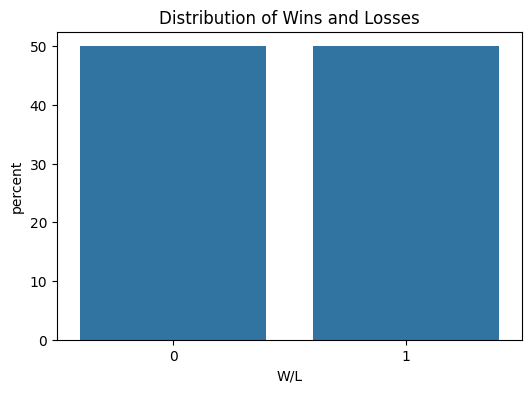

In [ ]:
# Visualize the distribution of wins and losses
plt.figure(figsize=(6, 4))
sns.countplot(x='W/L', data=data, stat='percent')
plt.title('Distribution of Wins and Losses')
plt.show()

This plot illustrates the distribution of wins and losses in the dataset, expressed as percentages. Both categories, "Win" (1) and "Loss" (0), are nearly equally distributed, with each comprising approximately 50% of the total observations. This balance indicates no significant class imbalance in the target variable.

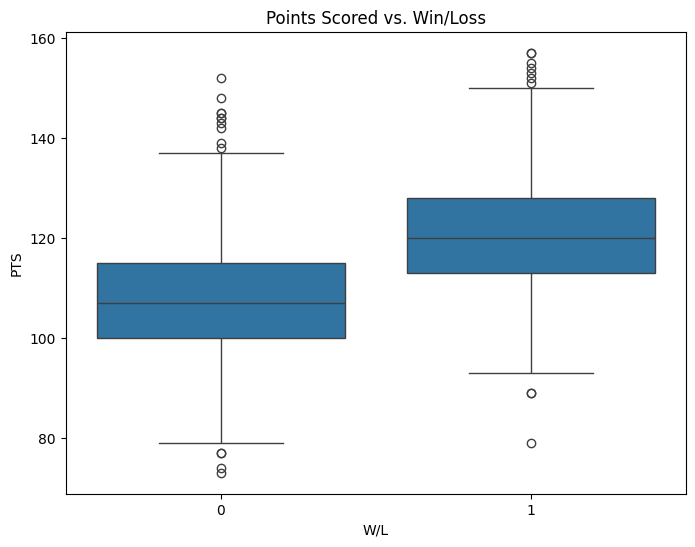

In [ ]:
# Explore the relationship between points and win/loss
plt.figure(figsize=(8, 6))
sns.boxplot(x='W/L', y='PTS', data=data)
plt.title('Points Scored vs. Win/Loss')
plt.show()


This boxplot explores the relationship between points scored (PTS) and the win/loss outcome (W/L). Teams that won (W/L = 1) generally scored higher points, with a median above 120 points, compared to losing teams (W/L = 0), which have a median closer to 100 points. The spread of points is larger for losing teams, suggesting more variability in their scoring. Outliers are present in both categories, with some games having unusually high or low scores. This indicates that higher points scored are generally associated with winning outcomes.

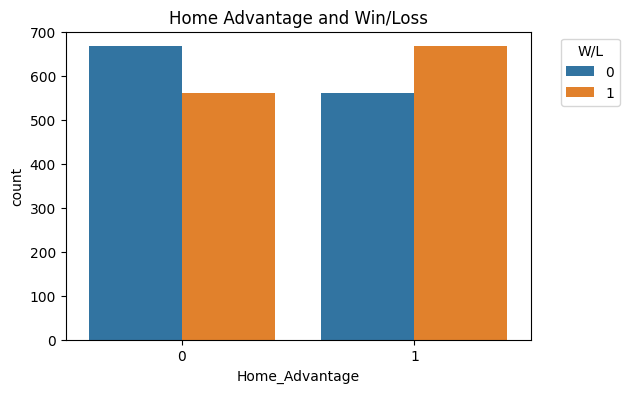

In [ ]:
# Analyze the impact of home advantage
plt.figure(figsize=(6, 4))
sns.countplot(x='Home_Advantage', hue='W/L', data=data)
plt.title('Home Advantage and Win/Loss')
plt.legend(title='W/L', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


This bar chart examines the relationship between home advantage and win/loss outcomes. Teams with home advantage (`Home_Advantage = 1`) have a higher count of wins (`W/L = 1`) compared to losses, indicating that playing at home is associated with better performance. Conversely, teams without home advantage (`Home_Advantage = 0`) show more losses than wins, suggesting the absence of home advantage may contribute to poorer performances. This supports the hypothesis that home advantage positively influences a team's likelihood of winning.

In [ ]:
numerical_data = data.select_dtypes(include=np.number)
numerical_data.columns

Index(['W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-',
       'Home_Advantage'],
      dtype='object')

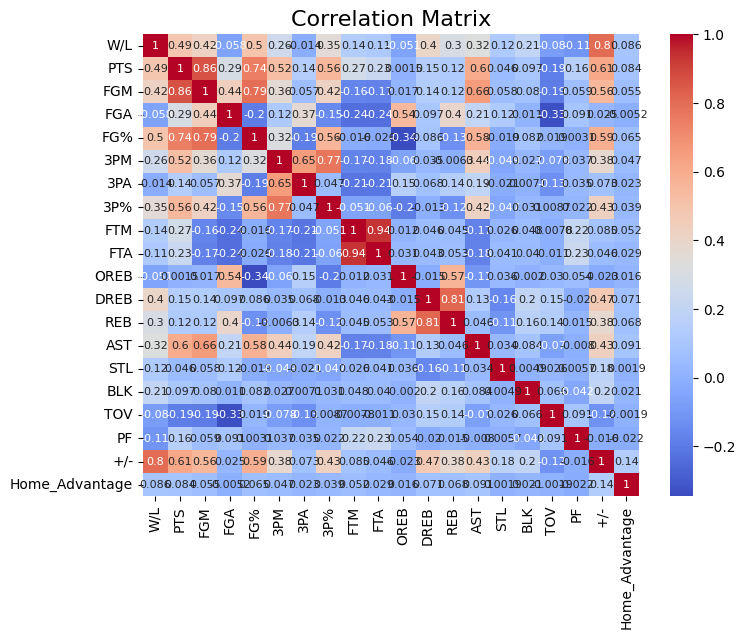

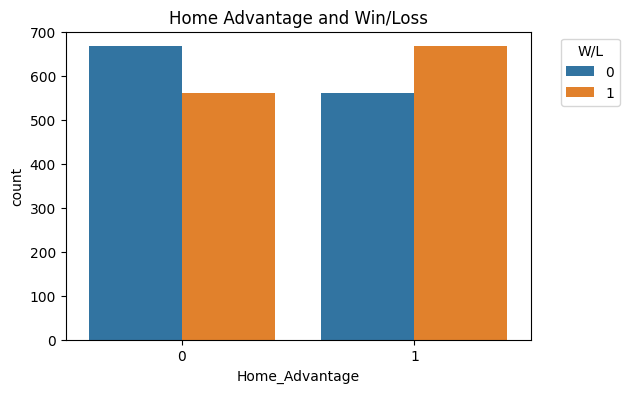

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    numeric_columns.corr(),
    annot=True,
    annot_kws={"size": 8},
    cmap='coolwarm'
)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

insignificant_vars = ['FT%', 'STL', 'BLK', 'TOV', 'PF', 'OREB', 'DREB', 'FTA', 'REB', 'AST']
  # Add other insignificant columns
data_clean = data.drop(columns=insignificant_vars)

plt.figure(figsize=(6, 4))
sns.countplot(x='Home_Advantage', hue='W/L', data=data_clean)
plt.title('Home Advantage and Win/Loss')
plt.legend(title='W/L', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This heatmap visualizes the correlation matrix for numerical features in the dataset, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Strong correlations are highlighted in red, while weak or negative correlations are shown in blue. Key observations include a strong positive correlation between `PTS` (points scored) and `FGM` (field goals made), and a noticeable positive correlation between `REB` (rebounds) and `OREB/DREB` (offensive/defensive rebounds). The win/loss outcome (`W/L`) shows moderate positive correlations with `PTS`, `FG%`, and `AST`, indicating their potential importance in influencing game results. This matrix helps identify relationships that may guide feature selection for further analysis.

In [ ]:
# Set a threshold
threshold = 0.8

# Find feature pairs with high correlation
high_corr_pairs = correlation_matrix.unstack()  # Convert to Series
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > threshold]  # Apply threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
high_corr_pairs = high_corr_pairs.drop_duplicates()  # Remove duplicate pairs

print("Highly Correlated Features (Threshold > 0.8):")
print(high_corr_pairs)


Highly Correlated Features (Threshold > 0.8):
PTS   FGM    0.864809
FTM   FTA    0.936512
DREB  REB    0.814266
dtype: float64


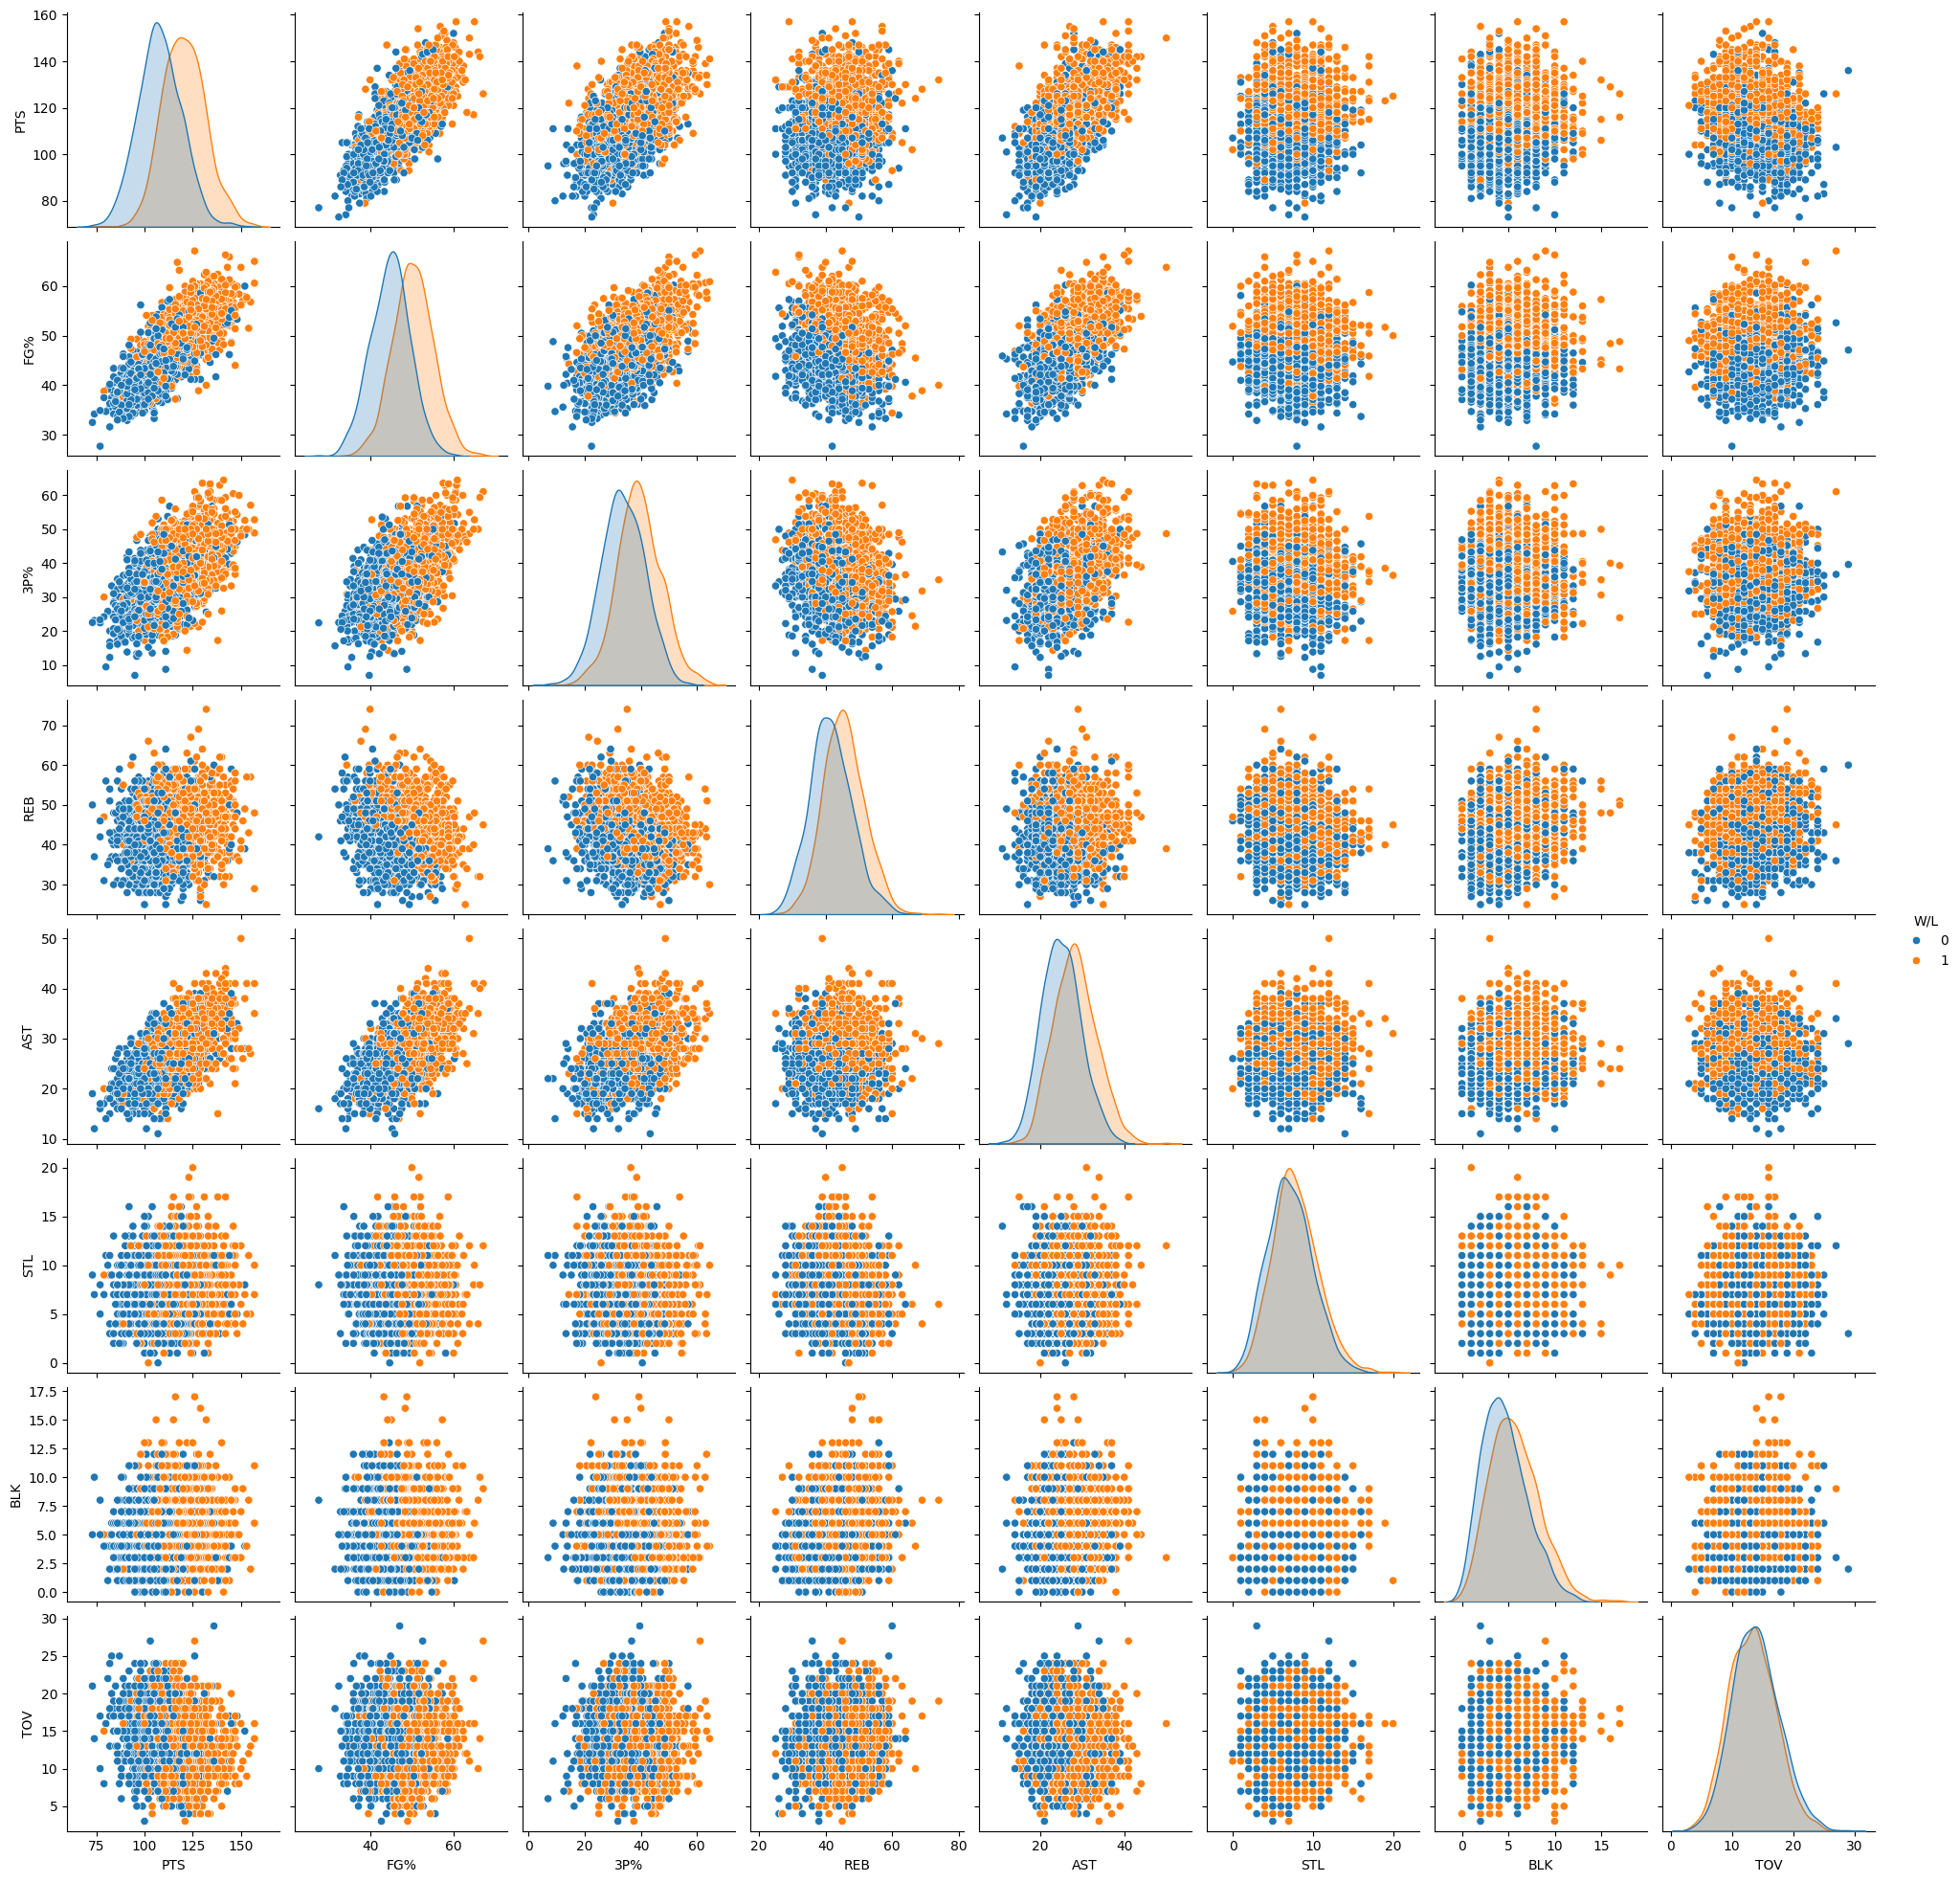

In [ ]:
# Pairplot for selected numerical features
selected_features = ['PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']
sns.pairplot(data[selected_features + ['W/L']], hue='W/L')
plt.show()

This pairplot visualizes the relationships and distributions of selected numerical features (`PTS`, `FG%`, `3P%`, `FT%`, `REB`, `AST`, `STL`, `BLK`, `TOV`) in relation to the win/loss outcome (`W/L`). Each scatterplot shows the pairwise correlation between features, color-coded by win (orange) and loss (blue). The diagonal plots display the distribution of each feature for wins and losses. Notable patterns, such as higher `PTS` and `FG%` being associated with wins, may indicate key factors that influence game outcomes. This plot is useful for identifying feature interactions and differences across win/loss categories.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('FT%').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('FT%').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Group by Home Advantage to calculate average W/L rates
home_advantage_effect = data.groupby('Home_Advantage')['W/L'].mean()

<ipython-input-51-31b72f8a645e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_advantage_effect.index, y=home_advantage_effect.values, palette="viridis")


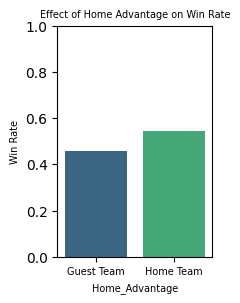

In [ ]:
# Plot the effect of Home Advantage on W/L rates
plt.figure(figsize=(2, 3))
bar_width = 0.1
sns.barplot(x=home_advantage_effect.index, y=home_advantage_effect.values, palette="viridis")
plt.title('Effect of Home Advantage on Win Rate', fontsize=7)
plt.xlabel('Home_Advantage', fontsize=7)
plt.ylabel('Win Rate', fontsize=7)
plt.xticks([0, 1], ['Guest Team', 'Home Team'], fontsize=7)
plt.ylim(0, 1)
plt.show()

In [ ]:
# Days since last game - Evan
team_game_dates = dict(data.groupby("Team")["Game Date"].apply(list))
data["days_since_last"] = data[["Team", "Game Date"]].apply(lambda x: pd.to_datetime(team_game_dates[x[0]][team_game_dates[x[0]].index(x[1])]) - pd.to_datetime(team_game_dates[x[0]][team_game_dates[x[0]].index(x[1]) - 1]) , axis = 1)
data["days_since_last"] = data["days_since_last"].apply(lambda x: 0 if x.total_seconds() < 0 else x.days)

<ipython-input-7-32d36154d472>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data["days_since_last"] = data[["Team", "Game Date"]].apply(lambda x: pd.to_datetime(team_game_dates[x[0]][team_game_dates[x[0]].index(x[1])]) - pd.to_datetime(team_game_dates[x[0]][team_game_dates[x[0]].index(x[1]) - 1]) , axis = 1)


In [ ]:
#WEIGHTED VARIANCE

def weighted_variance(series, weights):
  x_bar = weighted_avg(series, weights)
  series_len = len(series)
  if series_len < len(weights):
    weights = weights[:series_len]  # Adjust weights for shorter series
  weighted_variance = np.sum(weights[-len(weights):] * (series[-len(weights):] - x_bar) ** 2) / np.sum(weights)

  return weighted_variance

data['Weighted_Var_PTS'] = (
    data.groupby('Team')['PTS']  # Group by team
    .rolling(window=n, min_periods=1)  # Rolling window of size n
    .apply(lambda x: weighted_variance(x, weights), raw=True)  # Apply weighted_var()
    .reset_index(level=0, drop=True)  # Align indices with the original DataFrame
)


data['Weighted_Var_FGM'] = (
    data.groupby('Team')['FGM']  # Group by team
    .rolling(window=n, min_periods=1)  # Rolling window of size n
    .apply(lambda x: weighted_variance(x, weights), raw=True)  # Apply weighted_var()
    .reset_index(level=0, drop=True)  # Align indices with the original DataFrame
)

NameError: name 'n' is not defined

In [ ]:
# Process the DataFrame
new_rows = []
for i in range(0, len(data), 2):
  if i + 1 < len(data):
    row1 = data.iloc[i]
    row2 = data.iloc[i+1]
    new_row = {}

    # Home Team data
    for col in data.columns:
      if col != 'MIN':
        new_row[col] = row1[col]
      else:
        new_row[col] = row1[col]

    # Away Team data
    for col in data.columns:
      if col != 'MIN':
        new_row[f"Guest_{col}"] = row2[col]
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

# Standardize 'Game Date'
new_df['Game Date'] = pd.to_datetime(new_df['Game Date']).dt.strftime('%Y-%m-%d')

# Convert 'W/L' and 'away_W/L' to numeric (0 for loss, 1 for win)
new_df['W/L'] = new_df['W/L'].map({'W': 1, 'L': 0})
new_df['Guest_W/L'] = new_df['Guest_W/L'].map({'W': 1, 'L': 0})

new_df
new_df.columns

Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-', 'Home_Advantage',
       'days_since_last', 'Guest_Team', 'Guest_Match Up', 'Guest_Game Date',
       'Guest_W/L', 'Guest_PTS', 'Guest_FGM', 'Guest_FGA', 'Guest_FG%',
       'Guest_3PM', 'Guest_3PA', 'Guest_3P%', 'Guest_FTM', 'Guest_FTA',
       'Guest_FT%', 'Guest_OREB', 'Guest_DREB', 'Guest_REB', 'Guest_AST',
       'Guest_STL', 'Guest_BLK', 'Guest_TOV', 'Guest_PF', 'Guest_+/-',
       'Guest_Home_Advantage', 'Guest_days_since_last'],
      dtype='object')

In [ ]:
new_df.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,Guest_DREB,Guest_REB,Guest_AST,Guest_STL,Guest_BLK,Guest_TOV,Guest_PF,Guest_+/-,Guest_Home_Advantage,Guest_days_since_last
0,GSW,GSW vs. PHX,2023-10-24,NaN,240,104,36,101,35.6,10,...,43,60,23,5,7,19,22,4,0,0
1,LAL,LAL @ DEN,2023-10-24,NaN,240,107,41,90,45.6,10,...,33,42,29,9,6,12,15,12,1,0
2,MEM,MEM vs. NOP,2023-10-25,NaN,240,104,38,91,41.8,12,...,41,51,38,10,8,12,23,23,1,0
3,WAS,WAS @ IND,2023-10-25,NaN,240,120,44,96,45.8,9,...,39,51,34,5,3,19,21,6,1,0
4,NYK,NYK vs. BOS,2023-10-25,NaN,240,104,36,97,37.1,18,...,32,48,22,11,3,7,18,1,1,0


In [ ]:
# CHECK THIS DATASET - CONFIRM IF IT IS CORRECT.
data['Game Date'] = pd.to_datetime(data['Game Date']) # datetime format

# Sort the dataset by Game Date
df = data.sort_values(by=['Game Date']).reset_index(drop=True)

# Extract Home_Team and Guest_Team from Match Up
def parse_home_guest(row):
    if "vs." in row['Match Up']:
        return pd.Series({'Home_Team': row['Team'], 'Guest_Team': row['Match Up'].split('vs. ')[-1].strip()})
    elif "@" in row['Match Up']:
        return pd.Series({'Home_Team': row['Match Up'].split('@ ')[-1].strip(), 'Guest_Team': row['Team']})

df[['Home_Team', 'Guest_Team']] = df.apply(parse_home_guest, axis=1)

# Merge rows for the same game (Match Up and Game Date)
combined_df = (
    df.merge(df, on=['Game Date', 'Home_Team', 'Guest_Team'], suffixes=('_Home', '_Guest'))
    .query("Team_Home != Team_Guest")  # Ensure no self-matching
    .drop_duplicates(subset=['Game Date', 'Home_Team', 'Guest_Team'])  # Remove duplicates
)

# Keep one Match Up column for validation and remove other redundant columns
combined_df['Match Up'] = combined_df['Match Up_Home']
combined_df = combined_df.drop(columns=['Match Up_Home', 'Match Up_Guest', 'Team_Home', 'Team_Guest'])

# Convert 'W/L_Home' and 'W/L_Guest' to numeric (0 for lose, 1 for win)
combined_df['W/L_Home'] = combined_df['W/L_Home'].map({'W': 1, 'L': 0})
combined_df['W/L_Guest'] = combined_df['W/L_Guest'].map({'W': 1, 'L': 0})

# Reorganize columns to include Match Up, Game Date, Home_Team, Guest_Team, and stats
columns_to_keep = ['Game Date', 'Match Up', 'Home_Team', 'Guest_Team'] + \
                  [col for col in combined_df.columns if '_Home' in col or '_Guest' in col]
final_df = combined_df[columns_to_keep]

final_df = final_df.sort_values(by='Game Date').reset_index(drop=True) # game date oldest to newest

final_df.to_csv("New_Dataset.csv", index=False)

In [ ]:
# Adds unweighted columns, by Nam
# Ensure the DataFrame is sorted by 'Game Date'
final_df = final_df.sort_values(by='Game Date')

# Define numeric columns
numeric_cols = final_df.select_dtypes(include=[np.number]).columns

# Create an empty DataFrame to store results
result_df = pd.DataFrame()

# Group by 'Game Date'
for date, group in final_df.groupby('Game Date'):
    # Get all rows before the current group
    previous_rows = final_df[final_df['Game Date'] < date]

    # Compute cumulative sum and count for previous rows
    cumulative_sum = previous_rows[numeric_cols].sum()
    cumulative_count = previous_rows[numeric_cols].count()

    # Calculate the unweighted average for the group
    unweighted_avg = cumulative_sum / cumulative_count
    unweighted_avg = unweighted_avg.fillna(0.0)  # Handle division by zero for the first group

    # Add the unweighted average as new columns for the current group
    for col in numeric_cols:
        group[f"{col}_unweighted_avg"] = unweighted_avg[col]

    # Append the group to the result DataFrame
    result_df = pd.concat([result_df, group], ignore_index=True)

final_df = result_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 94 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Game Date                             1230 non-null   datetime64[ns]
 1   Match Up                              1230 non-null   object        
 2   Home_Team                             1230 non-null   object        
 3   Guest_Team                            1230 non-null   object        
 4   W/L_Home                              0 non-null      float64       
 5   MIN_Home                              1230 non-null   int64         
 6   PTS_Home                              1230 non-null   int64         
 7   FGM_Home                              1230 non-null   int64         
 8   FGA_Home                              1230 non-null   int64         
 9   FG%_Home                              1230 non-null   float64       
 10  

In [ ]:
final_df.head() # unweighted avgs included

,Game Date,Match Up,Home_Team,Guest_Team,W/L_Home,MIN_Home,PTS_Home,FGM_Home,FGA_Home,FG%_Home,...,DREB_Guest_unweighted_avg,REB_Guest_unweighted_avg,AST_Guest_unweighted_avg,STL_Guest_unweighted_avg,BLK_Guest_unweighted_avg,TOV_Guest_unweighted_avg,PF_Guest_unweighted_avg,+/-_Guest_unweighted_avg,Home_Advantage_Guest_unweighted_avg,days_since_last_Guest_unweighted_avg
0,2023-10-24,GSW vs. PHX,GSW,PHX,NaN,240,104,36,101,35.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-10-24,LAL @ DEN,DEN,LAL,NaN,240,107,41,90,45.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-10-25,ATL @ CHA,CHA,ATL,NaN,240,110,39,93,41.9,...,38.0,51.0,26.0,7.0,6.5,15.5,18.5,8.0,0.5,0.0
3,2023-10-25,CHI vs. OKC,CHI,OKC,NaN,240,104,39,94,41.5,...,38.0,51.0,26.0,7.0,6.5,15.5,18.5,8.0,0.5,0.0
4,2023-10-25,DAL @ SAS,SAS,DAL,NaN,240,126,47,99,47.5,...,38.0,51.0,26.0,7.0,6.5,15.5,18.5,8.0,0.5,0.0


In [ ]:
# Match up ratio - Evan
temp = data["Match Up"]
data["Match Up"] = data["Match Up"].apply(lambda x: x.replace("@", "vs.")) # Standardized Match up col
data["W/L"] = (data["W/L"] == "W").apply(lambda x: int(x)) # lets record wins as 1 & loss as 0 to average
match_up_ratios = dict(data.groupby("Match Up")["W/L"].mean())
data["match_up_ratio"] = data["Match Up"].apply(lambda x: match_up_ratios[x])
data["Match Up"] = temp # restore the orignal column with @ & vs

In [ ]:
#print(data.dtypes)

In [ ]:
# Ensure the 'Game Date' column is in datetime format
data['Game Date'] = pd.to_datetime(data['Game Date'])

# Sort the data by Team and Game Date
data = data.sort_values(by=['Team', 'Game Date']).reset_index(drop=True)

# Assign weights from 0.1 to 1.0 for each team
def assign_weights(group):
    group['Weight'] = np.linspace(0.1, 1.0, len(group))
    return group

data = data.groupby('Team').apply(assign_weights).reset_index(drop=True)

# Display the dataset with the new Weight column
data[['Team', 'Game Date', 'Weight']].head(83)

<ipython-input-16-98f803ade8ec>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Team').apply(assign_weights).reset_index(drop=True)


,Team,Game Date,Weight
0,ATL,2023-10-25,0.100000
1,ATL,2023-10-27,0.111111
2,ATL,2023-10-29,0.122222
3,ATL,2023-10-30,0.133333
4,ATL,2023-11-01,0.144444
...,...,...,...
78,ATL,2024-04-09,0.966667
79,ATL,2024-04-10,0.977778
80,ATL,2024-04-12,0.988889
81,ATL,2024-04-14,1.000000


In [ ]:
# WEIGHTED AVERAGE REFERENCE ONLY- Mandy

# Number of games to consider
# n = 10  # Adjust to test different windows

# # Define weights for the last n games
# weights = np.arange(1, n + 1) # [1, 2, ..., n]

# # Calculate weighted average
# def weighted_avg(series, weights):
#     series_len = len(series)
#     if series_len < len(weights):
#         weights = weights[:series_len]  # Adjust weights for shorter series
#     return np.sum(series[::-1] * weights) / np.sum(weights)

# # Apply rolling weighted average to compute weighted STL
# final_df['Weighted_Avg_STL'] = (
#     final_df.groupby('Team')['STL']  # Group by team
#     .rolling(window=n, min_periods=1)  # Rolling window of size n
#     .apply(lambda x: weighted_avg(x, weights), raw=True) # apply weighted_avg()
#     .reset_index(level=0, drop=True)  # Align indices with original DataFrame
# )

In [ ]:
# WEIGHTED AVERAGE ALL STATS - Mandy
# Number of games to consider
n = 10  # Rolling window size (last 10 games)

# Define weights for the last n games (linearly increasing weights)
weights = np.arange(1, n + 1)  # [1, 2, ..., n]

# Calculate weighted average
def weighted_avg(series, weights):
    series_len = len(series)
    if series_len < len(weights):
        weights = weights[:series_len]  # Adjust weights for shorter series
    return np.sum(series[-len(weights):] * weights[-len(series):]) / np.sum(weights)

# List of stats to calculate weighted averages for
stats = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'OREB',
         'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']

for stat in stats:
    # Weighted average for Home team
    final_df[f'Weighted_Home_{stat}'] = (
        final_df.groupby('Home_Team')[f'{stat}_Home']  # Group by Home_Team
        .rolling(window=n, min_periods=1)  # Rolling window of size n
        .apply(lambda x: weighted_avg(x, weights), raw=True)  # apply weighted_avg()
        .reset_index(level=0, drop=True)  # Align indices with original dataframe
    )

    # Weighted average for Guest team
    final_df[f'Weighted_Guest_{stat}'] = (
        final_df.groupby('Guest_Team')[f'{stat}_Guest']  # Group by Guest_Team
        .rolling(window=n, min_periods=1)  # Rolling window of size n
        .apply(lambda x: weighted_avg(x, weights), raw=True)  # apply weighted_avg()
        .reset_index(level=0, drop=True)  # Align indices with original dataframe
    )

In [ ]:
# Add some stats that can't be calculated ^ - Gabriel

final_df['Weighted_Home_FT%'] = np.where(final_df['Weighted_Home_FTA'] == 0, 0, final_df['Weighted_Home_FTM'] / final_df['Weighted_Home_FTA'] * 100) # Replace non-numeric = 0
final_df['Weighted_Guest_FT%'] = np.where(final_df['Weighted_Guest_FTA'] == 0, 0, final_df['Weighted_Guest_FTM'] / final_df['Weighted_Guest_FTA'] * 100)
final_df['Weighted_Home_2P%'] = ((final_df['Weighted_Home_FGM'] - final_df['Weighted_Home_3PM']) / (final_df['Weighted_Home_FGA'] - final_df['Weighted_Home_3PA']) * 100)
final_df['Weighted_Guest_2P%'] = ((final_df['Weighted_Guest_FGM'] - final_df['Weighted_Guest_3PM']) / (final_df['Weighted_Guest_FGA'] - final_df['Weighted_Guest_3PA']) * 100)

<ipython-input-19-f64bdd435fdd>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['Weighted_Home_2P%'] = ((final_df['Weighted_Home_FGM'] - final_df['Weighted_Home_3PM']) / (final_df['Weighted_Home_FGA'] - final_df['Weighted_Home_3PA']) * 100)
<ipython-input-19-f64bdd435fdd>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['Weighted_Guest_2P%'] = ((final_df['Weighted_Guest_FGM'] - final_df['Weighted_Guest_3PM']) / (final_df['Weighted_Guest_FGA'] - final_df['Weighted_Guest_3PA']) * 100)


In [ ]:
final_df.to_csv("Dataset_With_Weighted_Averages.csv", index=False)

In [ ]:
final_df.head()

,Game Date,Match Up,Home_Team,Guest_Team,W/L_Home,MIN_Home,PTS_Home,FGM_Home,FGA_Home,FG%_Home,...,Weighted_Home_TOV,Weighted_Guest_TOV,Weighted_Home_PF,Weighted_Guest_PF,Weighted_Home_+/-,Weighted_Guest_+/-,Weighted_Home_FT%,Weighted_Guest_FT%,Weighted_Home_2P%,Weighted_Guest_2P%
0,2023-10-24,GSW vs. PHX,GSW,PHX,NaN,240,104,36,101,35.6,...,11.0,19.0,23.0,22.0,-4.0,4.0,78.571429,76.470588,44.827586,50.000000
1,2023-10-24,LAL @ DEN,DEN,LAL,NaN,240,107,41,90,45.6,...,12.0,12.0,18.0,15.0,-12.0,12.0,75.000000,75.000000,50.819672,59.649123
2,2023-10-25,ATL @ CHA,CHA,ATL,NaN,240,110,39,93,41.9,...,12.0,19.0,19.0,21.0,-6.0,6.0,81.818182,73.076923,53.125000,65.306122
3,2023-10-25,CHI vs. OKC,CHI,OKC,NaN,240,104,39,94,41.5,...,13.0,16.0,16.0,19.0,-20.0,20.0,77.777778,83.333333,51.923077,60.465116
4,2023-10-25,DAL @ SAS,SAS,DAL,NaN,240,126,47,99,47.5,...,12.0,19.0,20.0,23.0,7.0,-7.0,73.913043,72.727273,61.538462,64.814815


In [ ]:
final_df.columns

Index(['Game Date', 'Match Up', 'Home_Team', 'Guest_Team', 'W/L_Home',
       'MIN_Home', 'PTS_Home', 'FGM_Home', 'FGA_Home', 'FG%_Home',
       ...
       'Weighted_Home_TOV', 'Weighted_Guest_TOV', 'Weighted_Home_PF',
       'Weighted_Guest_PF', 'Weighted_Home_+/-', 'Weighted_Guest_+/-',
       'Weighted_Home_FT%', 'Weighted_Guest_FT%', 'Weighted_Home_2P%',
       'Weighted_Guest_2P%'],
      dtype='object', length=134)

In [ ]:
reviewed_final_df = final_df

In [ ]:
#trimming redundant columns
reviewed_final_df = reviewed_final_df.drop('Match Up', axis=1) # matchup info exists in other columns

reviewed_final_df = reviewed_final_df.drop(columns=reviewed_final_df.loc[:, 'MIN_Home':'+/-_Home'].columns) #removing future data

reviewed_final_df = reviewed_final_df.drop('W/L_Guest', axis = 1) # if the home team wins, the guest loses and vice versa

reviewed_final_df = reviewed_final_df.drop(columns=reviewed_final_df.loc[:, 'MIN_Guest':'+/-_Guest'].columns) #removing future data

reviewed_final_df = reviewed_final_df.drop(['MIN_Home_unweighted_avg', 'MIN_Guest_unweighted_avg'], axis = 1) #each game is the same length

reviewed_final_df = reviewed_final_df.drop(['days_since_last_Home_unweighted_avg', 'days_since_last_Guest_unweighted_avg'], axis = 1)

In [ ]:
reviewed_final_df.head()
reviewed_final_df.columns

Index(['Game Date', 'Home_Team', 'Guest_Team', 'W/L_Home',
       'Home_Advantage_Home', 'days_since_last_Home', 'Home_Advantage_Guest',
       'days_since_last_Guest', 'W/L_Home_unweighted_avg',
       'PTS_Home_unweighted_avg', 'FGM_Home_unweighted_avg',
       'FGA_Home_unweighted_avg', 'FG%_Home_unweighted_avg',
       '3PM_Home_unweighted_avg', '3PA_Home_unweighted_avg',
       '3P%_Home_unweighted_avg', 'FTM_Home_unweighted_avg',
       'FTA_Home_unweighted_avg', 'OREB_Home_unweighted_avg',
       'DREB_Home_unweighted_avg', 'REB_Home_unweighted_avg',
       'AST_Home_unweighted_avg', 'STL_Home_unweighted_avg',
       'BLK_Home_unweighted_avg', 'TOV_Home_unweighted_avg',
       'PF_Home_unweighted_avg', '+/-_Home_unweighted_avg',
       'Home_Advantage_Home_unweighted_avg', 'W/L_Guest_unweighted_avg',
       'PTS_Guest_unweighted_avg', 'FGM_Guest_unweighted_avg',
       'FGA_Guest_unweighted_avg', 'FG%_Guest_unweighted_avg',
       '3PM_Guest_unweighted_avg', '3PA_Guest_unweighte

In [ ]:
reviewed_final_df.to_csv("Reviewed_Final_DF.csv", index=False)

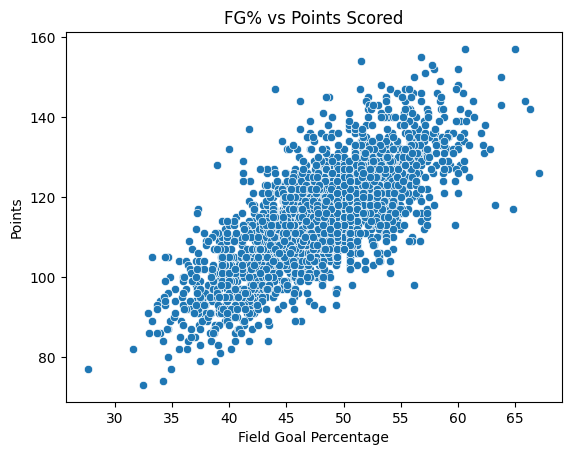

In [ ]:
import seaborn as sns
sns.scatterplot(x='FG%', y='PTS', data=data)
plt.title("FG% vs Points Scored")
plt.xlabel("Field Goal Percentage")
plt.ylabel("Points")
plt.show()

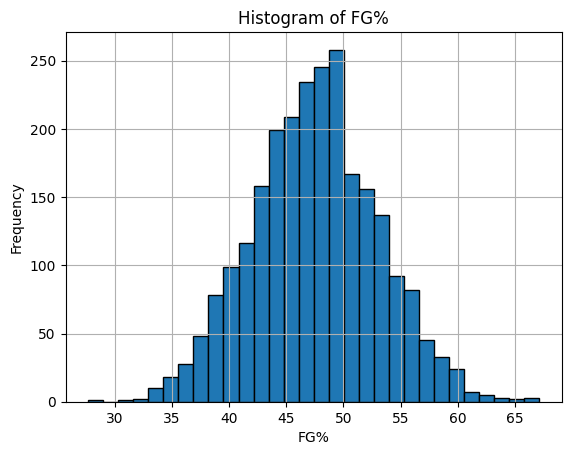

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for a feature
data['FG%'].hist(bins=30, edgecolor='black')
plt.title('Histogram of FG%')
plt.xlabel('FG%')
plt.ylabel('Frequency')
plt.show()

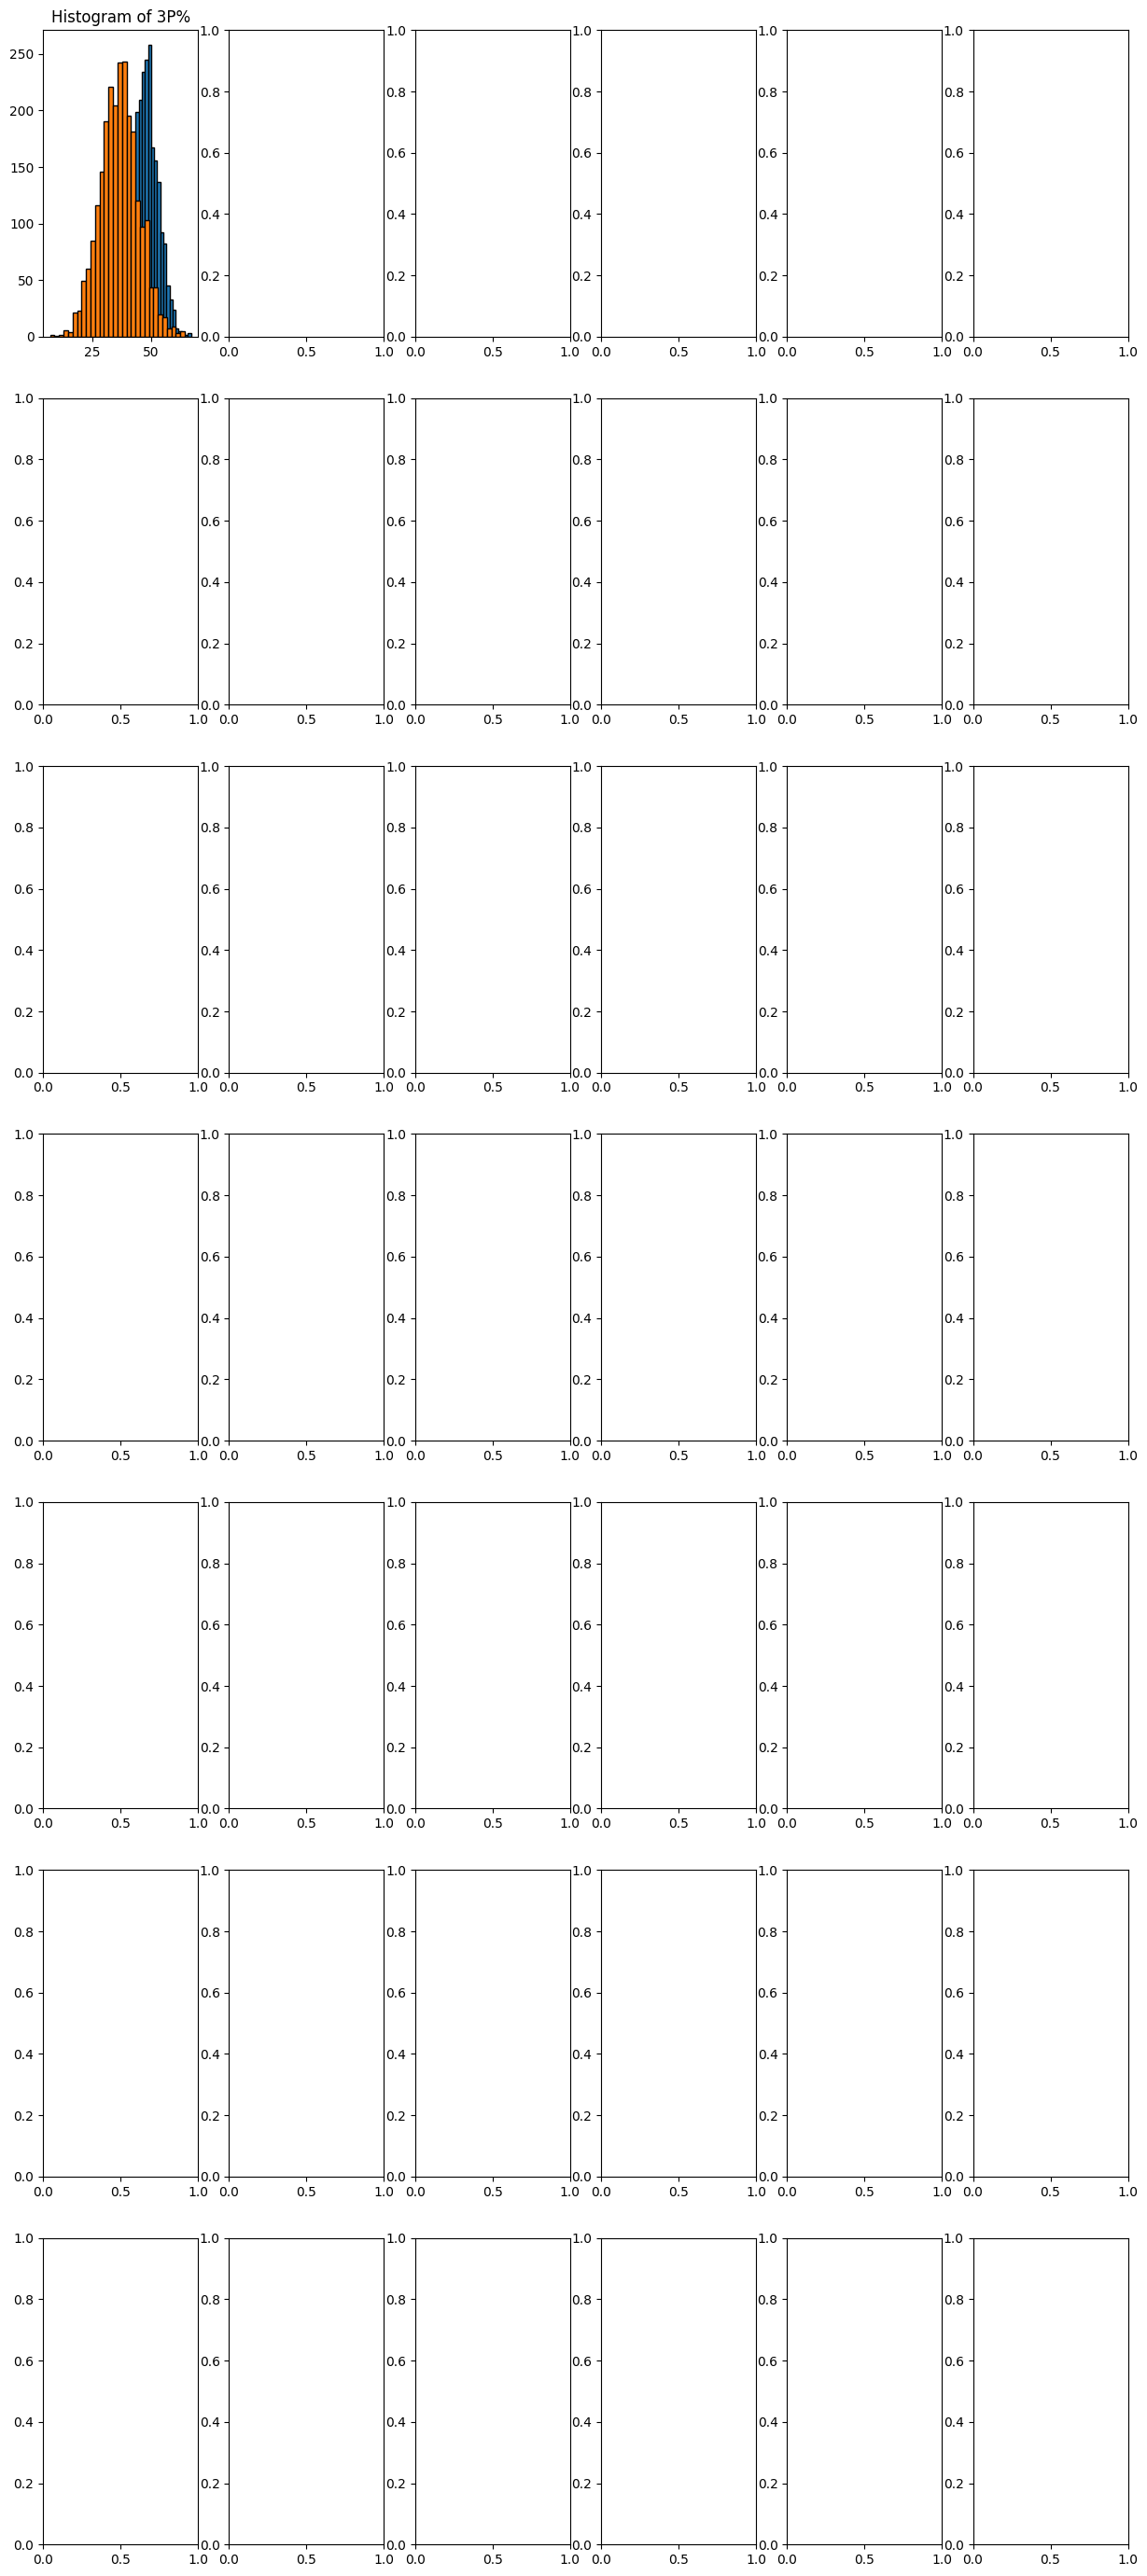

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew, kurtosis, probplot

n_features = len(numeric_cols)

n_rows = (n_features + 2) // 3
n_cols = 3

numeric_cols = data.select_dtypes(include=[float, int]).columns
shapiro_p_values = []

fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(15, 5 * n_rows))
axes = axes.flatten()

plot_index = 0

for col in numeric_cols:
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(data[col].dropna())  # Drop NaN values
    shapiro_p_values.append((col, p_value))

    # Only plot histogram and Q-Q plot if the feature is normally distributed (p-value > 0.05)
    if p_value > 0.05:
        # Histogram
        axes[plot_index * 2].hist(data[col].dropna(), bins=30, edgecolor='black')
        axes[plot_index * 2].set_title(f'Histogram of {col}')